In [1]:
#A class attribute that provides access to the TabularDatasetFactory methods for creating new TabularDataset objects. 
#Usage: Dataset.Tabular.from_delimited_files().
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b' #check the launch studio there will get this id
resource_group = 'VChamp-Team3' # resource group name
workspace_name = 'vchamp-team3' # worksapce name


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.
#Constructor
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_train']
datastore = workspace.datastores['data_team3_synthetic_train'] 

In [3]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'outpatient_visits_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
outpatient_train_data = dataset.to_pandas_dataframe()

In [5]:
outpatient_train_data.head()

Column1  Internalpatientid  Age at visit    Visit start date  \
0        0                  1     60.619995 2004-11-17 14:35:36   
1        1                  1     61.032110 2005-04-17 05:40:07   
2        2                  1     61.907075 2006-03-03 00:51:52   
3        3                  1     62.296573 2006-07-23 09:32:16   
4        4                  1     63.632066 2007-11-23 12:28:48   

  First listed diagnosis icd10 subcategory  \
0                            Not specified   
1                            Not specified   
2                            Not specified   
3                            Not specified   
4                            Not specified   

  Second listed diagnosis icd10 subcategory                  Stop code  \
0                             Not specified         TELEPHONE/MEDICINE   
1                             Not specified           TELEPHONE TRIAGE   
2                             Not specified                 LABORATORY   
3                             Not specified                   NO-COUNT   
4                             Not specified  GENERAL INTERNAL MEDICINE   

  Agentorangeflag Combatflag Ionizingradiationflag Serviceconnectedflag  \
0            None       None                  None                False   
1            None       None                  None                 True   
2            None       None                  None                 None   
3            None       None                  None                 None   
4            None       None                  None                False   

  Swasiaconditionsflag    State  
0                 None  Indiana  
1                 None  Indiana  
2                 None  Indiana  
3                 None  Indiana  
4                 None  Indiana

# Outpatient_visits_qul

# Obejective

* **To develop AI/ML models to predict cardiovascular health outcomes, including readmission and mortality, using synthetically generated Veteran health records.**

# **Dataset Description**

* **internalpatientid** -- Patient ID


* **age_at_visit** -- Patient's age (calculated) at the time of encounter.


* **visit_start_date** -- FD:The start date of the visit CD: Note that the data does not contain -Visit end date-time- for Outpatients.


* **first_listed_diagnosis_icd10_subcategory** -- Diagnosis - first-listed CD:Only one diagnosis can be marked as primary for a visit; there is no limit to the number of diagnoses that may be identified as secondary for a visit. FD:The first diagnosis listed for the visit based on logic to order by PrimarySecondary, VdiagnosisSID.     RN = 1 is first diagnosis.


* **second_listed_diagnosis_icd10_subcategory** -- Diagnosis - second-listed FD:The second diagnosis listed for the visit based on logic to order by PrimarySecondary, VdiagnosisSID.     RN = 2 is second diagnosis.


* **stop_code** -- Stop code (outpatient specialty) CD:Outpatient service (stop code) associated with the encounter.FD:The service line associated with the outpatient encounters.   stopcode is standard verbiage used int he VA so will keep this for outpatient encounters.


* **agentorangeflag** -- Agent Orange flag (Y/N) CD:Indicates whether this encounter was related to the patient?s exposure to Agent Orange. FD:This field is used to indicate that this visit represents treatment of a VA patient for a problem that is related to Agent Orange Exposure.(if 'Y' then Yes   If 'N' then No else 'not specified')


* **combatflag** -- Combat flag (Y/N) CD:Indicates whether this encounter was related to the patient?s combat service. FD:This field is used to indicate that the visit represents treatment of a VA patient for a problem that is possibly related to combat.(if 'Y' then Yes   If 'N' then No else 'not specified')


* **ionizingradiationflag** -- Ionizing radiation flag (Y/N) CD: Indicates whether this encounter was related to the patient?s exposure to ionizing radiation. FD:This field is used to indicate that this visit represents treatment of a VA patient for a problem that is related to Ionizing Radiation Exposure.(if 'Y' then Yes   If 'N' then No else 'not specified')


* **serviceconnectedflag** -- Service-connected flag (Y/N) CD:Indicates whether the encounter was for a service-connected condition. FD: This field will be used to indicate if this visit was for treating a  VA patient based on a service connected problem. (if 'Y' then Yes   If 'N' then No else 'not specified')


* **swasiaconditionsflag** -- SW Asia conditions flag (Y/N) CD:Indicates whether the encounter was for a condition related to service in southwest Asia. FD: This field is used to indicate that this visit represents treatment of a VA patient for a problem that is related to Southwest Asia Conditions  Exposure.(if 'Y' then Yes   If 'N' then No else 'not specified')


* **state** -- state



# Clinical terms

* **Primary Diagnosis** -- The primary diagnosis is the root cause of the visit.For example, a patient might present to the emergency room because he is dehydrated and is admitted for gastroenteritis. 


* **secondary diagnosis** -- The secondary diagnosis refers to a **coexisting condition that might exist at the time of patient admission.** This condition might evolve over the course of the patient's stay, or it might be cause for further treatment.


* **Example** : A doctor may put renal disorder as the primary diagnosis when a patient is admitted and then, after labs and examination, decide that the primary cause is hypertension and renal failure is the complication (e.i. secondary diagnosis).


* **stop code** -- VA medical facilities use Stop Codes (formerly known as Decision Support System Identifiers) **to identify workload for all outpatient encounters and inpatient professional services.** Each code is composed of a 6-character descriptor that includes a primary Stop Code and a credit (secondary) Stop Code.


- **First listed discharge diagnosis icd10 subcategory:** This feature represents the primary diagnosis for which the patient received treatment during their hospital stay.


- **Second listed discharge diagnosis icd10 subcategory:** This feature represents any additional secondary diagnoses for which the patient received treatment during their hospital stay.


- **Service-connected flag:** This feature indicates whether the patient's health condition is related to their military service.

- **Agent Orange flag:** This feature indicates whether the patient's health condition is related to exposure to Agent Orange, a herbicide used during the Vietnam War.


* **ionizing radiation** -- Radiation of certain wavelengths, called ionizing radiation, has enough energy to **damage DNA and cause cancer.** Ionizing radiation includes radon, x-rays, gamma rays, and other forms of high-energy radiation.


In [6]:
import numpy as np                # Multi-Dimensional array object
import pandas as pd               # Data Manipulation
import matplotlib.pyplot as plt   # Data Visualization
import seaborn as sns             # Data Visualization 

# Allows the use of display() for DataFrames
from IPython.display import display 

# Handle warning messages that may occur during code execution
import warnings
warnings.filterwarnings('ignore')

# To increase memory allocation
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'max_buffer_size': 7294967296})

# Importing the data

In [7]:
outpatient_train_data = outpatient_train_data

In [8]:
outpatient_train_data.head()

Column1  Internalpatientid  Age at visit    Visit start date  \
0        0                  1     60.619995 2004-11-17 14:35:36   
1        1                  1     61.032110 2005-04-17 05:40:07   
2        2                  1     61.907075 2006-03-03 00:51:52   
3        3                  1     62.296573 2006-07-23 09:32:16   
4        4                  1     63.632066 2007-11-23 12:28:48   

  First listed diagnosis icd10 subcategory  \
0                            Not specified   
1                            Not specified   
2                            Not specified   
3                            Not specified   
4                            Not specified   

  Second listed diagnosis icd10 subcategory                  Stop code  \
0                             Not specified         TELEPHONE/MEDICINE   
1                             Not specified           TELEPHONE TRIAGE   
2                             Not specified                 LABORATORY   
3                             Not specified                   NO-COUNT   
4                             Not specified  GENERAL INTERNAL MEDICINE   

  Agentorangeflag Combatflag Ionizingradiationflag Serviceconnectedflag  \
0            None       None                  None                False   
1            None       None                  None                 True   
2            None       None                  None                 None   
3            None       None                  None                 None   
4            None       None                  None                False   

  Swasiaconditionsflag    State  
0                 None  Indiana  
1                 None  Indiana  
2                 None  Indiana  
3                 None  Indiana  
4                 None  Indiana

# Initial Inspection of the Data

In [9]:
outpatient_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82692720 entries, 0 to 82692719
Data columns (total 13 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   Column1                                    int64         
 1   Internalpatientid                          int64         
 2   Age at visit                               float64       
 3   Visit start date                           datetime64[ns]
 4   First listed diagnosis icd10 subcategory   object        
 5   Second listed diagnosis icd10 subcategory  object        
 6   Stop code                                  object        
 7   Agentorangeflag                            object        
 8   Combatflag                                 object        
 9   Ionizingradiationflag                      object        
 10  Serviceconnectedflag                       object        
 11  Swasiaconditionsflag                       object        
 12

# Elimination of the unnamed columns

In [10]:
# Remove unwanted columns 
outpatient_train_data.drop('Column1',axis=1,inplace=True)

In [11]:
outpatient_train_data = outpatient_train_data

In [12]:
outpatient_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82692720 entries, 0 to 82692719
Data columns (total 12 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   Internalpatientid                          int64         
 1   Age at visit                               float64       
 2   Visit start date                           datetime64[ns]
 3   First listed diagnosis icd10 subcategory   object        
 4   Second listed diagnosis icd10 subcategory  object        
 5   Stop code                                  object        
 6   Agentorangeflag                            object        
 7   Combatflag                                 object        
 8   Ionizingradiationflag                      object        
 9   Serviceconnectedflag                       object        
 10  Swasiaconditionsflag                       object        
 11  State                                      object        
dty

* **After removing the unnamed column we have 12 featrues in this dataset**

In [13]:
#checking the row and colunms size
print ('The training data has {} rows and {} columns'.format(outpatient_train_data.shape[0],outpatient_train_data.shape[1]))
print(outpatient_train_data.shape)

The training data has 82692720 rows and 12 columns
(82692720, 12)


* **There are 12 columns and 82692720 rows.**

In [15]:
# Display the features of the datframe(taking the features for further task)

outpatient_train_data.columns

Index(['Internalpatientid', 'Age at visit', 'Visit start date',
       'First listed diagnosis icd10 subcategory',
       'Second listed diagnosis icd10 subcategory', 'Stop code',
       'Agentorangeflag', 'Combatflag', 'Ionizingradiationflag',
       'Serviceconnectedflag', 'Swasiaconditionsflag', 'State'],
      dtype='object')

In [16]:
# describe the "age" column
age_description = outpatient_train_data["Age at visit"].describe()


# accessing the specific statistics
count = age_description['count']
mean = age_description['mean']
min_value = age_description['min']
max_value = age_description['max']

#print specific statistics
print("Count:", count)
print("Mean:", mean)
print("Min value:", min_value)
print("max_value:", max_value)

Count: 82692720.0
Mean: 69.44765680919697
Min value: 11.021683798196282
max_value: 113.61559909687391


* **The patients in this dataset have a maximum age of 113.61.**
* **Min patient age in this dataset is 11.02**
* **The patients' average age is 69.44.**

In [17]:
outpatient_train_data.describe(include=['object'])

First listed diagnosis icd10 subcategory  \
count                                  82692720   
unique                                     6607   
top                               Not specified   
freq                                   70603206   

       Second listed diagnosis icd10 subcategory                 Stop code  \
count                                   82692720                  82692720   
unique                                      6240                       636   
top                                Not specified  Not specified (no value)   
freq                                    78185197                  12597280   

       Agentorangeflag Combatflag Ionizingradiationflag Serviceconnectedflag  \
count          3050996     132391                 99060             18973195   
unique               2          2                     2                    2   
top              False        Yes                    No                False   
freq           2832955      70536                 92191             13015469   

       Swasiaconditionsflag     State  
count                276210  82692720  
unique                    2        51  
top                   False   Florida  
freq                 261316   6563708

* **"First listed diagnosis icd10 subcategory" has 6607 distinct values, and "not specified(70603206 out of 82692720)" is the term that appears most frequently.**

* **"Second listed diagnosis icd10 subcategory" has 6240 distinct values,and "not specified (78185197 out of 82692720)" is the term that appears most frequently.**

* **"Stop code" has the 636 distinct values ,and "Not specified (no value)(12597280 out of 82692720)" is the term that appears most frequetly.**

* **There are two distinct values for "Agentorangeflag" (False/true), with "False" being the more frequent option (2832955).**

* **There are two distinct values for "Combatflag" (Yes/No), with "Yes" being the more frequent option (70536).**

* **There are two distinct values for "Ionizingradiationflag" (Yes/No), with "No" being the more frequent option (92191).**

* **There are two distinct values for "Serviceconnectedflag" (False/true), with "False" being the more frequent option (13015469).**

* **There are two distinct values for "Swasiaconditionsflag" (False/true), with "False" being the more frequent option (261316).**

* **There are 51 different states, with "Florida" being the most frequent (6563708).**

# checking the missing valuses

In [18]:
print("quality set missing values:\n", outpatient_train_data.isna().sum())

quality set missing values:
 Internalpatientid                                   0
Age at visit                                        0
Visit start date                                    0
First listed diagnosis icd10 subcategory            0
Second listed diagnosis icd10 subcategory           0
Stop code                                           0
Agentorangeflag                              79641724
Combatflag                                   82560329
Ionizingradiationflag                        82593660
Serviceconnectedflag                         63719525
Swasiaconditionsflag                         82416510
State                                               0
dtype: int64


* **The "Agentorangeflag" column (79641724) has several missing values.** 
* **The "Combatflag" column (82560329) has several missing values.** 
* **The "Ionizingradiationflag " column (82593660) has several missing values.** 
* **The "Serviceconnectedflag" column (63719525) has several missing values.**
* **The "Swasiaconditionsflag" column (82416510) has several missing values. moreover, no additional columns are missing.**

# Checking the categorical variables

In [20]:
# Exclude the Event date columns

data_without_Event_date =  outpatient_train_data.drop("Visit start date",axis=1)


#By passing the DataFrame `df` to the `get_categorical_columns()` function, you will obtain the categorical column names.
def get_categorical_columns(data_without_Event_date):
    # Check the data types
    categorical_columns = data_without_Event_date.select_dtypes(include=["object", "category"]).columns 
    return categorical_columns


# Call the function
categorical_columns = get_categorical_columns(data_without_Event_date)
print(categorical_columns)

Index(['First listed diagnosis icd10 subcategory',
       'Second listed diagnosis icd10 subcategory', 'Stop code',
       'Agentorangeflag', 'Combatflag', 'Ionizingradiationflag',
       'Serviceconnectedflag', 'Swasiaconditionsflag', 'State'],
      dtype='object')


* **9 categorical columns.**

# Checking the numerical variables

* **"Age at visit" is the only numerical column.**

In [21]:
# Exclude the patient ID columns

data_without_id = outpatient_train_data.drop("Internalpatientid",axis=1)

# Get the numerical varible 
continuous_varibles = data_without_id.select_dtypes(include=["int64","float64"])

#print the numerical varibles
print(continuous_varibles)

          Age at visit
0            60.619995
1            61.032110
2            61.907075
3            62.296573
4            63.632066
...                ...
82692715     96.300251
82692716     96.322523
82692717     96.327503
82692718     96.360092
82692719     96.626156

[82692720 rows x 1 columns]


# Univariate Analysis

# 1)  Histogram for Age at visit

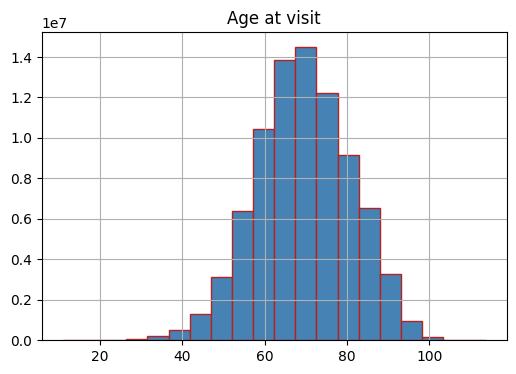

In [26]:
# Histogram for each continuous variable

continuous_varibles.hist(figsize=(6, 4), bins=20, layout=(1, 1), color='steelblue',
                                   edgecolor='firebrick', linewidth=1);

* **There are shown outliers for the age ranges of 11–40(appx) and 90–113(appx).Box plot will be used to test that and find outliers in the future.**

# **2) Agentorangeflag**

In [28]:
#Checking the values each category in condition type

# Count the occurrences of each label
Agentorangeflag = outpatient_train_data["Agentorangeflag"].value_counts()
Agentorangeflag

False    2832955
True      218041
Name: Agentorangeflag, dtype: int64

* **Under the "Agentorangeflag" columns, false (28322955) and true (208041) are present** 

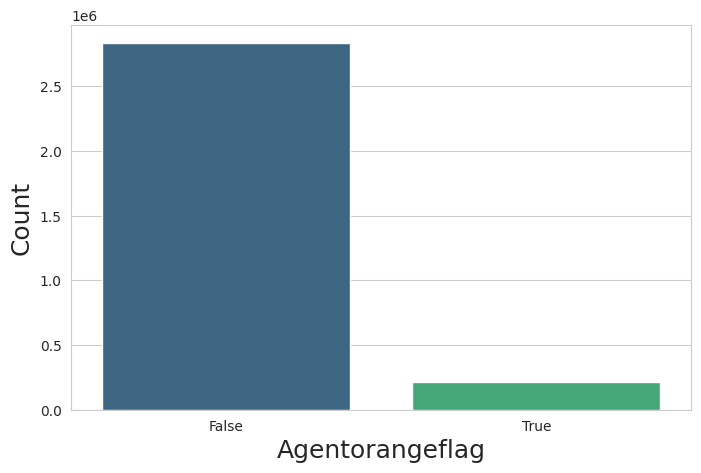

In [31]:
# Countplot for the feature 'Condition type' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Agentorangeflag', data=outpatient_train_data, palette='viridis')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Agentorangeflag', fontsize = 18);

* **The "Agentorangeflag" columns have a greater proportion of "False" categories and a smaller proportion of "true" categories**

# 3) Combatflag

In [32]:
#Checking the values each category in condition type

# Count the occurrences of each label
Combatflag = outpatient_train_data["Combatflag"].value_counts()
Combatflag

Yes    70536
No     61855
Name: Combatflag, dtype: int64

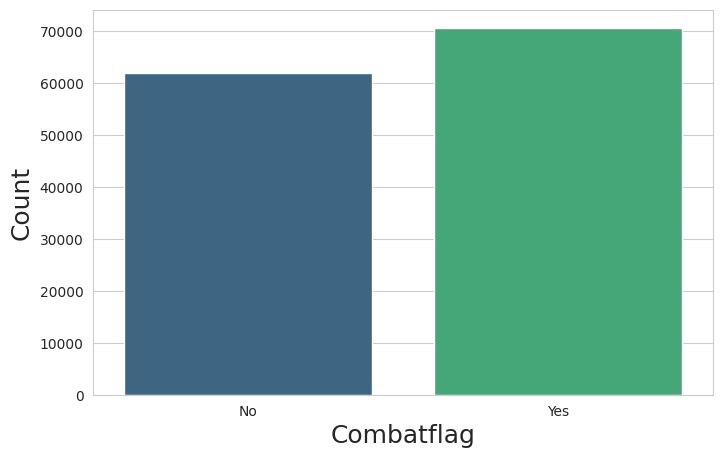

In [33]:
# Countplot for the feature 'Combatflag' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Combatflag', data=outpatient_train_data, palette='viridis')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Combatflag', fontsize = 18);

* **The "Combatflag" columns have a greater proportion of "yes" categories and a smaller proportion of "no" categories.**

# **4) Ionizingradiationflag**

In [34]:
#Checking the values each category in condition type

# Count the occurrences of each label
Ionizingradiationflag = outpatient_train_data["Ionizingradiationflag"].value_counts()
Ionizingradiationflag

No     92191
Yes     6869
Name: Ionizingradiationflag, dtype: int64

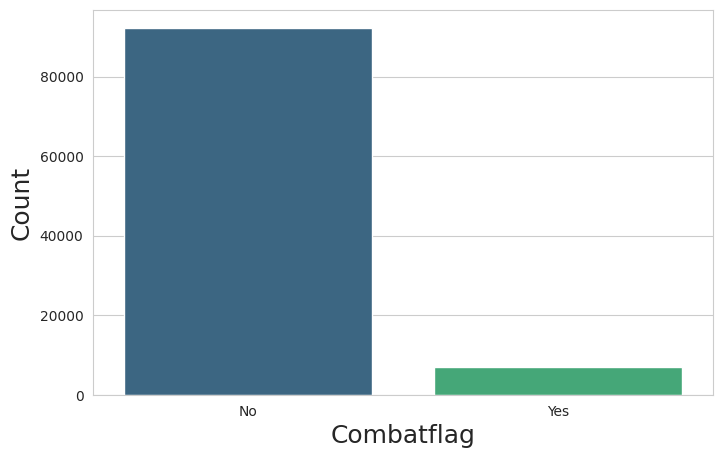

In [35]:
# Countplot for the feature 'Ionizingradiationflag' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Ionizingradiationflag', data=outpatient_train_data, palette='viridis')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Combatflag', fontsize = 18);

* **The "Ionizingradiationflag" columns have a greater proportion of "No" categories and a smaller proportion of "Yes" categories.**

# **5) Serviceconnectedflag**

In [36]:
#Checking the values each category in condition type

# Count the occurrences of each label
Serviceconnectedflag = outpatient_train_data["Serviceconnectedflag"].value_counts(normalize=True)
Serviceconnectedflag

False    0.685992
True     0.314008
Name: Serviceconnectedflag, dtype: float64

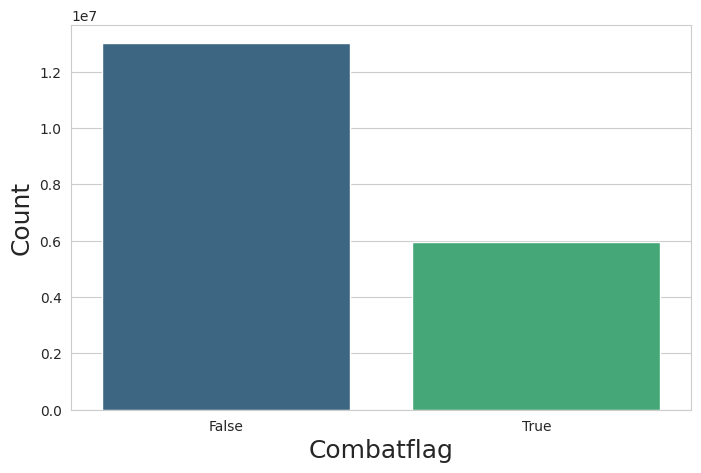

In [37]:
# Countplot for the feature 'Serviceconnectedflag' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Serviceconnectedflag', data=outpatient_train_data, palette='viridis')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Combatflag', fontsize = 18);

* **The "Serviceconnectedflag" columns have a greater proportion of "False(68%)" categories and a smaller proportion of "true(32%)" categories.**

# 6) **Swasiaconditionsflag**

In [39]:
#Checking the values each category in condition type

# Count the occurrences of each label
Swasiaconditionsflag = outpatient_train_data["Swasiaconditionsflag"].value_counts(normalize=True)
Swasiaconditionsflag

False    0.946077
True     0.053923
Name: Swasiaconditionsflag, dtype: float64

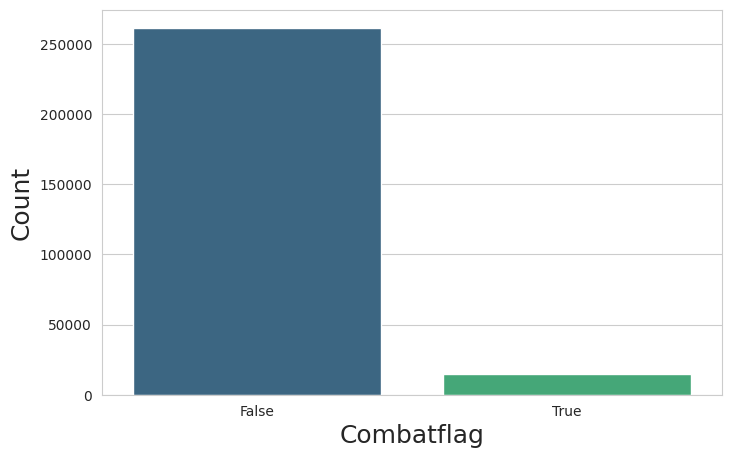

In [40]:
# Countplot for the feature 'Swasiaconditionsflag' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Swasiaconditionsflag', data=outpatient_train_data, palette='viridis')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Combatflag', fontsize = 18);

* **The "Swasiaconditionsflag" columns have a greater proportion of "False(95%)" categories and a smaller proportion of "true(4%)" categories.**

# **7) Stop code**

In [43]:
outpatient_train_data["Stop code"].nunique()

636

* **There are 636 distinct stop codes presented.**

In [42]:
#Checking the values each category in condition type

# Count the occurrences of each label
Stop_code = outpatient_train_data["Stop code"].value_counts()
Stop_code

Not specified (no value)          12597280
LABORATORY                        12297292
PRIMARY CARE/MEDICINE              7120877
ADMIN PAT ACTIVTIES (MASNONCT)     4205426
X-RAY & FLUORO (XR & RF)           2148323
                                    ...   
OBSERVATION SPINAL CORD INJURY           1
ECHOCARDIOGRAM                           1
TELEMEDICINE                             1
INPATIENT DIAGNOSTIC PROFEE              1
EPILEPSY                                 1
Name: Stop code, Length: 636, dtype: int64

* **In the stop code columns, there are more no.of of "Not specified (no value)" (12597280), "Laboratory" (12297292), and "Primary Care/Medicine" (7120877).**

# **8) First listed diagnosis icd10 subcategory**

In [47]:
#Checking the values each category in condition type

# Count the occurrences of each label
first_list = outpatient_train_data["First listed diagnosis icd10 subcategory"].value_counts().loc[lambda x: x>200]
first_list

Not specified                                                                  70603206
Other specified counseling                                                       720331
Encounter for other specified aftercare                                          539853
Counseling, unspecified                                                          345595
Essential (primary) hypertension                                                 313963
                                                                                 ...   
Diverticular disease of small intestine without perforation or abscess              201
Non-follicular (diffuse) lymphoma, unspecified                                      201
Diverticulitis of intestine, part unspecified, with perforation and abscess         201
Mechanical complication of urinary catheter                                         201
Pemphigus, unspecified                                                              201
Name: First listed diagnosis icd

* **There are more "Not specified" (70603206), "Other specified counselling" (720331), and "Encounter for other specified aftercare" (539853) values in the "First listed diagnosis icd10 subcategory" columns.**

* **Note: This is very significant feature for cardiac task.**

* **Note: The majority of values are "Not specified", thus we must take this into account before handling the missing value.**

# **9) Second listed diagnosis icd10 subcategory**

In [48]:
#Checking the values each category in condition type

# Count the occurrences of each label
sec_list = outpatient_train_data["Second listed diagnosis icd10 subcategory"].value_counts().loc[lambda x: x>200]
sec_list

Not specified                                                                          78185197
Essential (primary) hypertension                                                         207434
Unspecified atrial fibrillation and atrial flutter                                       192069
Long term (current) use of anticoagulants and antithrombotics/antiplatelets              142482
Type 2 diabetes mellitus without complications                                           105136
                                                                                         ...   
Other symptoms and signs concerning food and fluid intake                                   201
Military activity                                                                           201
Pressure ulcer of contiguous site of back, buttock and hip                                  201
Abnormal findings on diagnostic imaging of skull and head, not elsewhere classified         201
Other and unspecified adhesions and disr

* **There are more "Not specified" (78185197), "Essential (primary) hypertension" (207434), and "Unspecified atrial fibrillation and atrial flutte" (192069) values in the "Second listed diagnosis icd10 subcategory" columns.**

* **Note: This is very significant feature for cardiac task.**

# **Dropping all unnecessary columns**

* **Based on the analysis, we determine the significance of each column, so we keep those that are providing information that is potentially useful for our specific goal.**

* **The columns "Column1","Visit start date","Stop code","Agentorangeflag","Combatflag","Ionizingradiationflag","Serviceconnectedflag","Swasiaconditionsflag" and "State" are not necessary, hence they will be removed while keeping the ones that are important.**

 * **Note: Since "First listed diagnosis icd10 subcategory" and "Second listed diagnosis icd10 subcategory" has more patient-related information, will value this feature highly (text data, now relevant NLP).**

In [11]:
# Remove columns 
outpatient_train_data.drop(['Column1','Visit start date','Stop code','Agentorangeflag','Combatflag',
                            'Ionizingradiationflag','Serviceconnectedflag','Swasiaconditionsflag','State'], axis=1,inplace=True)

In [12]:
outpatient_train_data = outpatient_train_data # giving the new variable a name

In [13]:
outpatient_train_data.head() # Taking the important varible for our task

Internalpatientid  Age at visit First listed diagnosis icd10 subcategory  \
0                  1     60.619995                            Not specified   
1                  1     61.032110                            Not specified   
2                  1     61.907075                            Not specified   
3                  1     62.296573                            Not specified   
4                  1     63.632066                            Not specified   

  Second listed diagnosis icd10 subcategory  
0                             Not specified  
1                             Not specified  
2                             Not specified  
3                             Not specified  
4                             Not specified

# Now Creating the bucket with the various age ranges and adding 'icd-10' to paticular age group range

In [14]:
#In this code, we first define the age ranges using tuples. Then, we iterate over the age ranges and create a new column for each range using a lambda function. 
#The lambda function checks if the age falls within the range and assigns the icd_10 value accordingly.


# Define the age ranges
age_ranges = [(11.0, 29.9), (30.0, 39.9), (40.0, 49.9), (50.0, 59.9), (60.0, 69.9), (70.0, 79.9), (80.0, 89.9), (90.0, 99.9),(100.0,114.0)]

# Create the new columns based on age ranges
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_first_icd10'
    second_range_label = f'{range_start}-{range_end}_second_icd10'
    outpatient_train_data[range_label] = outpatient_train_data.apply(
        lambda row: row['First listed diagnosis icd10 subcategory'] if range_start <= row['Age at visit'] <= range_end else None,
        axis=1
    )
    outpatient_train_data[second_range_label] = outpatient_train_data.apply(
        lambda row: row['Second listed diagnosis icd10 subcategory'] if range_start <= row['Age at visit'] <= range_end else None,
        axis=1
    )

In [15]:
#After creating the new columns, we group the DataFrame by 'Internalpatientid' and 
#use the `agg` function to concatenate the icd10 values within each group. 


# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values and
#The purpose of `x.dropna()` is to remove any missing values from the Series before applying a subsequent operation,
# such as concatenation using the `join` function. By dropping the missing values,
#we ensure that only non-null values are included in the resulting concatenated string.
df_grouped = outpatient_train_data.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped 

# Reset the index of the grouped DataFrame
df_grouped_outpatient = df_grouped.reset_index()
df_grouped_outpatient

Internalpatientid           First listed diagnosis icd10 subcategory  \
0                       1  Not specified,Not specified,Not specified,Not ...   
1                       2  Not specified,Not specified,Not specified,Not ...   
2                       3  Not specified,Not specified,Not specified,Not ...   
3                       4  Not specified,Not specified,Not specified,Not ...   
4                       5  Not specified,Not specified,Not specified,Not ...   
...                   ...                                                ...   
133247             169060  Not specified,Not specified,Not specified,Not ...   
133248             169061  Not specified,Not specified,Not specified,Type...   
133249             169062  Not specified,Not specified,Not specified,Not ...   
133250             169063  Not specified,Not specified,Not specified,Not ...   
133251             169064  Not specified,Not specified,Not specified,Not ...   

                Second listed diagnosis icd10 subcategory  \
0       Not specified,Not specified,Not specified,Not ...   
1       Not specified,Not specified,Not specified,Not ...   
2       Not specified,Not specified,Not specified,Not ...   
3       Not specified,Not specified,Not specified,Not ...   
4       Not specified,Not specified,Not specified,Not ...   
...                                                   ...   
133247  Not specified,Not specified,Not specified,Not ...   
133248  Not specified,Not specified,Not specified,Not ...   
133249  Not specified,Not specified,Not specified,Not ...   
133250  Not specified,Not specified,Not specified,Not ...   
133251  Not specified,Not specified,Not specified,Not ...   

       11.0-29.9_first_icd10 11.0-29.9_second_icd10 30.0-39.9_first_icd10  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           
...                      ...                    ...                   ...   
133247                                                                      
133248                                                                      
133249                                                                      
133250                                                                      
133251                                                                      

       30.0-39.9_second_icd10  \
0                               
1                               
2                               
3                               
4                               
...                       ...   
133247                          
133248                          
133249                          
133250                          
133251                          

                                    40.0-49.9_first_icd10  \
0                                                           
1       Not specified,Not specified,Not specified,Not ...   
2                                                           
3                                                           
4                                                           
...                                                   ...   
133247                                                      
133248                                                      
133249                                                      
133250                                                      
133251                                                      

                                   40.0-49.9_second_icd10  \
0                                                           
1       Not specified,Not specified,Not specified,Not ...   
2                                                           
3              

In [72]:
# Checking the particular patients id
fl= df_grouped_outpatient[df_grouped_outpatient["Internalpatientid"]==3]
fl

Internalpatientid           First listed diagnosis icd10 subcategory  \
2                  3  Not specified,Not specified,Not specified,Not ...   

           Second listed diagnosis icd10 subcategory 11.0-29.9_first_icd10  \
2  Not specified,Not specified,Not specified,Not ...                   NaN   

  11.0-29.9_second_icd10 30.0-39.9_first_icd10 30.0-39.9_second_icd10  \
2                    NaN                   NaN                    NaN   

  40.0-49.9_first_icd10 40.0-49.9_second_icd10 50.0-59.9_first_icd10  ...  \
2                   NaN                    NaN                   NaN  ...   

  60.0-69.9_first_icd10 60.0-69.9_second_icd10  \
2                   NaN                    NaN   

                               70.0-79.9_first_icd10  \
2  Not specified,Not specified,Not specified,Not ...   

                              70.0-79.9_second_icd10  \
2  Not specified,Not specified,Not specified,Not ...   

                               80.0-89.9_first_icd10  \
2  Not specified,Not specified,Not specified,Not ...   

                              80.0-89.9_second_icd10 90.0-99.9_first_icd10  \
2  Not specified,Not specified,Not specified,Not ...                   NaN   

  90.0-99.9_second_icd10 100.0-114.0_first_icd10 100.0-114.0_second_icd10  
2                    NaN                     NaN                      NaN  

[1 rows x 21 columns]

* **Over a period of time, Patient 1 has visited the hospital due to a some problem.**

# **Checking the missing value after creating the bucketing**

In [18]:
# Replace blank values with NaN
df_grouped_outpatient.replace('', np.nan, inplace=True)

# checking the null values(for bucketing data) 
missing_values_count = df_grouped_outpatient.isnull().sum()

# taking the total no.of rows
total_rows = df_grouped_outpatient.shape[0]

# taking the percetage of missing value
missing_percentage = (missing_values_count / total_rows) * 100
#creating the data frame
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

missing_data_summary

Missing Values Count  \
Internalpatientid                                             0   
First listed diagnosis icd10 subcategory                      0   
Second listed diagnosis icd10 subcategory                     0   
11.0-29.9_first_icd10                                    132543   
11.0-29.9_second_icd10                                   132543   
30.0-39.9_first_icd10                                    129789   
30.0-39.9_second_icd10                                   129789   
40.0-49.9_first_icd10                                    117073   
40.0-49.9_second_icd10                                   117073   
50.0-59.9_first_icd10                                     85419   
50.0-59.9_second_icd10                                    85419   
60.0-69.9_first_icd10                                     58147   
60.0-69.9_second_icd10                                    58147   
70.0-79.9_first_icd10                                     46541   
70.0-79.9_second_icd10                                    46541   
80.0-89.9_first_icd10                                     78770   
80.0-89.9_second_icd10                                    78770   
90.0-99.9_first_icd10                                    117845   
90.0-99.9_second_icd10                                   117845   
100.0-114.0_first_icd10                                  132506   
100.0-114.0_second_icd10                                 132506   

                                           Missing Values Percentage  
Internalpatientid                                           0.000000  
First listed diagnosis icd10 subcategory                    0.000000  
Second listed diagnosis icd10 subcategory                   0.000000  
11.0-29.9_first_icd10                                      99.467925  
11.0-29.9_second_icd10                                     99.467925  
30.0-39.9_first_icd10                                      97.401165  
30.0-39.9_second_icd10                                     97.401165  
40.0-49.9_first_icd10                                      87.858344  
40.0-49.9_second_icd10                                     87.858344  
50.0-59.9_first_icd10                                      64.103353  
50.0-59.9_second_icd10                                     64.103353  
60.0-69.9_first_icd10                                      43.636868  
60.0-69.9_second_icd10                                     43.636868  
70.0-79.9_first_icd10                                      34.927056  
70.0-79.9_second_icd10                                     34.927056  
80.0-89.9_first_icd10                                      59.113559  
80.0-89.9_second_icd10                                     59.113559  
90.0-99.9_first_icd10                                      88.437697  
90.0-99.9_second_icd10                                     88.437697  
100.0-114.0_first_icd10                                    99.440158  
100.0-114.0_second_icd10                                   99.440158

* **The columns "11-29.9_icd10" contain 99% of the missing values.**
* **The columns "30.0-39.9_icd10" contain 97% of the missing values.**
* **The columns "40.0-49.9_icd10" contain 87% of the missing values.**
* **The columns "50.0-59.9_icd10" contain 64% of the missing values.**
* **The columns "60.0-69.9_icd10" contain 43% of the missing values.**
* **The columns "70.0-79.9_icd10" contain 34% of the missing values.**
* **The columns "80.0-89.9_icd10" contain 59% of the missing values.**
* **The columns "90.0-99.9_icd10" contain 88% of the missing values.**
* **The columns "100.0-114_icd10" contain 99% of the missing values.**

* **Note: The same proportion of missing data is present in both the "First listed diagnosis icd10 subcategory" and the "Second listed diagnosis icd10 subcategory."**

# **Death dataset**

# **Importing the death data**

In [21]:
# from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [22]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
death_train = dataset.to_pandas_dataframe()

In [23]:
death_train.head()

Column1  Internalpatientid  Age at death          Death date
0        0             100036     72.412770 2015-01-18 20:49:10
1        1             100037     75.241135 2008-10-16 15:14:26
2        2             100045     85.399403 2019-01-26 11:33:52
3        3             100095     84.136551 2004-08-10 21:49:35
4        6              10013     68.372126 2007-06-11 00:17:06

# **Elimination of the unnamed columns**

In [24]:
# Remove unwanted columns 
death_train.drop('Column1',axis=1,inplace=True)

In [25]:
death_train = death_train

In [26]:
death_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97284 entries, 0 to 97283
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Internalpatientid  97284 non-null  int64         
 1   Age at death       97284 non-null  float64       
 2   Death date         97284 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


* **In the death file we have 97284 rows and 3 coulmns.**

In [27]:
death_train['Internalpatientid'].nunique() # so the all the death patients id's are unique in the death file

97284

* **Note: As a result, each patient's ID in the death file is distinct.**

# **Checking the age** 

In [28]:
# describe the "age" column
age_description = death_train["Age at death"].describe()


# accessing the specific statistics
count = age_description['count']
mean = age_description['mean']
min_value = age_description['min']
max_value = age_description['max']

#print specific statistics
print("Count:", count)
print("Mean:", mean)
print("Min value:", min_value)
print("max_value:", max_value)

Count: 97284.0
Mean: 78.36066132259062
Min value: 22.71159624056341
max_value: 110.22737741931398


# Checking the missing value for death file 

In [30]:
print("Training set missing values:\n", death_train.isna().sum())

Training set missing values:
 Internalpatientid    0
Age at death         0
Death date           0
dtype: int64


* **There is no missing value in the death file**

# Histogram for Age at death

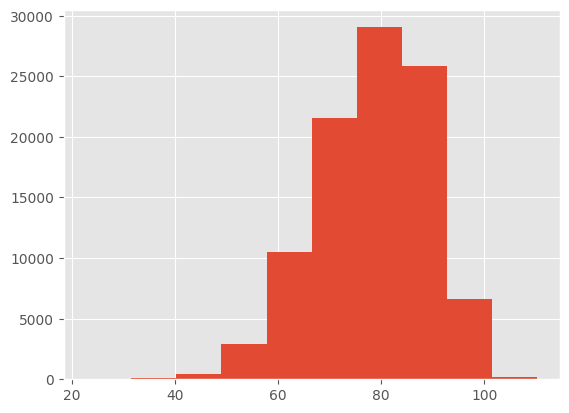

In [32]:
import matplotlib.pyplot as plt
# Histogram for each continuous variable
plt.style.use('ggplot')
plt.hist(death_train["Age at death"], bins=10)
plt.show()

* **The majority of patients are between the ages of 50 and 90.**

# Age at Death (Box plot for outlier detection)

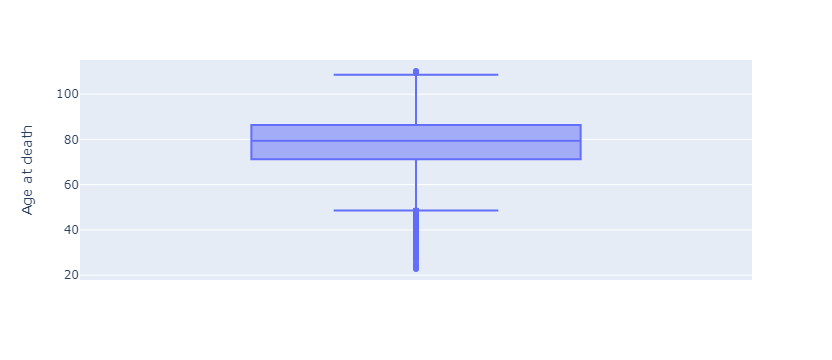

In [33]:
import plotly.express as px
fig = px.box(death_train, y="Age at death")
fig.show()

* **In the death file,Ages of less than 48 and greater than 109 have been detected as outliers.**

* **Median = 79.41, q1=71.20, q3=86.32.**

In [34]:
# Creating the new "death"(1) columns 
death_train['death']=1
death_train.head()

Internalpatientid  Age at death          Death date  death
0             100036     72.412770 2015-01-18 20:49:10      1
1             100037     75.241135 2008-10-16 15:14:26      1
2             100045     85.399403 2019-01-26 11:33:52      1
3             100095     84.136551 2004-08-10 21:49:35      1
4              10013     68.372126 2007-06-11 00:17:06      1

# Merging the death and outpatients file

In [35]:
# Left joint will take all the patients id from df_grouped_condition file and common id from death files
merge_outpatient_death_left = pd.merge(df_grouped_outpatient, death_train, how='left',on='Internalpatientid') 

In [36]:
merge_outpatient_death_left

Internalpatientid           First listed diagnosis icd10 subcategory  \
0                       1  Not specified,Not specified,Not specified,Not ...   
1                       2  Not specified,Not specified,Not specified,Not ...   
2                       3  Not specified,Not specified,Not specified,Not ...   
3                       4  Not specified,Not specified,Not specified,Not ...   
4                       5  Not specified,Not specified,Not specified,Not ...   
...                   ...                                                ...   
133247             169060  Not specified,Not specified,Not specified,Not ...   
133248             169061  Not specified,Not specified,Not specified,Type...   
133249             169062  Not specified,Not specified,Not specified,Not ...   
133250             169063  Not specified,Not specified,Not specified,Not ...   
133251             169064  Not specified,Not specified,Not specified,Not ...   

                Second listed diagnosis icd10 subcategory  \
0       Not specified,Not specified,Not specified,Not ...   
1       Not specified,Not specified,Not specified,Not ...   
2       Not specified,Not specified,Not specified,Not ...   
3       Not specified,Not specified,Not specified,Not ...   
4       Not specified,Not specified,Not specified,Not ...   
...                                                   ...   
133247  Not specified,Not specified,Not specified,Not ...   
133248  Not specified,Not specified,Not specified,Not ...   
133249  Not specified,Not specified,Not specified,Not ...   
133250  Not specified,Not specified,Not specified,Not ...   
133251  Not specified,Not specified,Not specified,Not ...   

       11.0-29.9_first_icd10 11.0-29.9_second_icd10 30.0-39.9_first_icd10  \
0                        NaN                    NaN                   NaN   
1                        NaN                    NaN                   NaN   
2                        NaN                    NaN                   NaN   
3                        NaN                    NaN                   NaN   
4                        NaN                    NaN                   NaN   
...                      ...                    ...                   ...   
133247                   NaN                    NaN                   NaN   
133248                   NaN                    NaN                   NaN   
133249                   NaN                    NaN                   NaN   
133250                   NaN                    NaN                   NaN   
133251                   NaN                    NaN                   NaN   

       30.0-39.9_second_icd10  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   
...                       ...   
133247                    NaN   
133248                    NaN   
133249                    NaN   
133250                    NaN   
133251                    NaN   

                                    40.0-49.9_first_icd10  \
0                                                     NaN   
1       Not specified,Not specified,Not specified,Not ...   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
133247                                                NaN   
133248                                                NaN   
133249                                                NaN   
133250                                                NaN   
133251                                                NaN   

                                   40.0-49.9_second_icd10  \
0                                                     NaN   
1       Not specified,Not specified,Not specified,Not ...   
2                                                     NaN   
3              

* **We obtained 133252 rows and 14 columns after combining the data.** 
* **Note : This data contain both alive and death patients Id's**
* **Note : The no.of same as conditions file.**(we have check is any relation are there)

# Now filling the alive patients id's with "0"

In [38]:
merge_outpatient_death_left['death'] = merge_outpatient_death_left['death'].fillna(0)

In [39]:
merge_outpatient_death_left

Internalpatientid           First listed diagnosis icd10 subcategory  \
0                       1  Not specified,Not specified,Not specified,Not ...   
1                       2  Not specified,Not specified,Not specified,Not ...   
2                       3  Not specified,Not specified,Not specified,Not ...   
3                       4  Not specified,Not specified,Not specified,Not ...   
4                       5  Not specified,Not specified,Not specified,Not ...   
...                   ...                                                ...   
133247             169060  Not specified,Not specified,Not specified,Not ...   
133248             169061  Not specified,Not specified,Not specified,Type...   
133249             169062  Not specified,Not specified,Not specified,Not ...   
133250             169063  Not specified,Not specified,Not specified,Not ...   
133251             169064  Not specified,Not specified,Not specified,Not ...   

                Second listed diagnosis icd10 subcategory  \
0       Not specified,Not specified,Not specified,Not ...   
1       Not specified,Not specified,Not specified,Not ...   
2       Not specified,Not specified,Not specified,Not ...   
3       Not specified,Not specified,Not specified,Not ...   
4       Not specified,Not specified,Not specified,Not ...   
...                                                   ...   
133247  Not specified,Not specified,Not specified,Not ...   
133248  Not specified,Not specified,Not specified,Not ...   
133249  Not specified,Not specified,Not specified,Not ...   
133250  Not specified,Not specified,Not specified,Not ...   
133251  Not specified,Not specified,Not specified,Not ...   

       11.0-29.9_first_icd10 11.0-29.9_second_icd10 30.0-39.9_first_icd10  \
0                        NaN                    NaN                   NaN   
1                        NaN                    NaN                   NaN   
2                        NaN                    NaN                   NaN   
3                        NaN                    NaN                   NaN   
4                        NaN                    NaN                   NaN   
...                      ...                    ...                   ...   
133247                   NaN                    NaN                   NaN   
133248                   NaN                    NaN                   NaN   
133249                   NaN                    NaN                   NaN   
133250                   NaN                    NaN                   NaN   
133251                   NaN                    NaN                   NaN   

       30.0-39.9_second_icd10  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   
...                       ...   
133247                    NaN   
133248                    NaN   
133249                    NaN   
133250                    NaN   
133251                    NaN   

                                    40.0-49.9_first_icd10  \
0                                                     NaN   
1       Not specified,Not specified,Not specified,Not ...   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
133247                                                NaN   
133248                                                NaN   
133249                                                NaN   
133250                                                NaN   
133251                                                NaN   

                                   40.0-49.9_second_icd10  \
0                                                     NaN   
1       Not specified,Not specified,Not specified,Not ...   
2                                                     NaN   
3              

# Converting the death column from a float to an int type

In [40]:
merge_outpatient_death_left['death'] = merge_outpatient_death_left['death'].astype(int)
merge_outpatient_death_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133252 entries, 0 to 133251
Data columns (total 24 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Internalpatientid                          133252 non-null  int64         
 1   First listed diagnosis icd10 subcategory   133252 non-null  object        
 2   Second listed diagnosis icd10 subcategory  133252 non-null  object        
 3   11.0-29.9_first_icd10                      709 non-null     object        
 4   11.0-29.9_second_icd10                     709 non-null     object        
 5   30.0-39.9_first_icd10                      3463 non-null    object        
 6   30.0-39.9_second_icd10                     3463 non-null    object        
 7   40.0-49.9_first_icd10                      16179 non-null   object        
 8   40.0-49.9_second_icd10                     16179 non-null   object        
 9   50.0

# Visualising the dead and alive patients

In [41]:
merge_outpatient_death_left['death'].value_counts()

1    97284
0    35968
Name: death, dtype: int64

In [42]:
merge_outpatient_death_left['death'].value_counts(normalize=True)

1    0.730075
0    0.269925
Name: death, dtype: float64

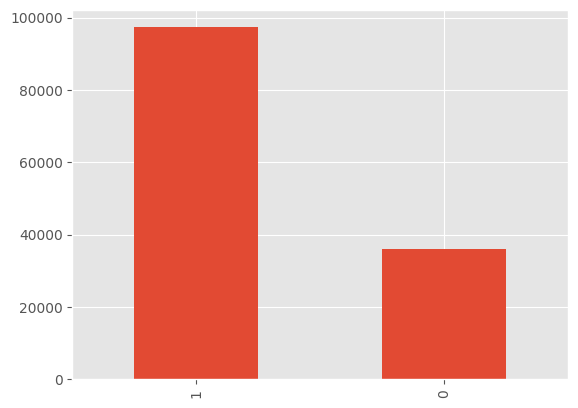

In [44]:
merge_outpatient_death_left['death'].value_counts().plot(kind='bar')

* **In all, 73% of people died for whatever cause. And 26% pepole are alive**

# Checking the alive patients in outpatient file

In [46]:
df_alive = merge_outpatient_death_left[merge_outpatient_death_left["death"]==0]
df_alive

Internalpatientid           First listed diagnosis icd10 subcategory  \
0                       1  Not specified,Not specified,Not specified,Not ...   
1                       2  Not specified,Not specified,Not specified,Not ...   
5                       8  Problem related to unspecified psychosocial ci...   
7                      11  Not specified,Not specified,Not specified,Not ...   
8                      13  Not specified,Not specified,Post-traumatic str...   
...                   ...                                                ...   
133232             169042  Not specified,Not specified,Not specified,Not ...   
133235             169046  Not specified,Not specified,Essential (primary...   
133236             169047  Not specified,Not specified,Not specified,Not ...   
133238             169049  Not specified,Not specified,Not specified,Not ...   
133246             169057  Not specified,Not specified,Not specified,Not ...   

                Second listed diagnosis icd10 subcategory  \
0       Not specified,Not specified,Not specified,Not ...   
1       Not specified,Not specified,Not specified,Not ...   
5       Not specified,Not specified,Not specified,Not ...   
7       Not specified,Not specified,Not specified,Not ...   
8       Not specified,Not specified,Anxiety disorder, ...   
...                                                   ...   
133232  Not specified,Not specified,Not specified,Not ...   
133235  Not specified,Not specified,Encounter for immu...   
133236  Not specified,Not specified,Not specified,Not ...   
133238  Not specified,Not specified,Not specified,Not ...   
133246  Not specified,Not specified,Not specified,Not ...   

       11.0-29.9_first_icd10 11.0-29.9_second_icd10 30.0-39.9_first_icd10  \
0                        NaN                    NaN                   NaN   
1                        NaN                    NaN                   NaN   
5                        NaN                    NaN                   NaN   
7                        NaN                    NaN                   NaN   
8                        NaN                    NaN                   NaN   
...                      ...                    ...                   ...   
133232                   NaN                    NaN                   NaN   
133235                   NaN                    NaN                   NaN   
133236                   NaN                    NaN                   NaN   
133238                   NaN                    NaN                   NaN   
133246                   NaN                    NaN                   NaN   

       30.0-39.9_second_icd10  \
0                         NaN   
1                         NaN   
5                         NaN   
7                         NaN   
8                         NaN   
...                       ...   
133232                    NaN   
133235                    NaN   
133236                    NaN   
133238                    NaN   
133246                    NaN   

                                    40.0-49.9_first_icd10  \
0                                                     NaN   
1       Not specified,Not specified,Not specified,Not ...   
5                                                     NaN   
7                                                     NaN   
8                                                     NaN   
...                                                   ...   
133232                                                NaN   
133235                                                NaN   
133236  Not specified,Not specified,Not specified,Not ...   
133238                                                NaN   
133246                                                NaN   

                                   40.0-49.9_second_icd10  \
0                                                     NaN   
1       Not specified,Not specified,Not specified,Not ...   
5                                                     NaN   
7              

* **35968 patients are alive.**

# Checking the death patients in condition file

In [47]:
df_death =  merge_outpatient_death_left[merge_outpatient_death_left["death"]==1]

In [48]:
df_death 

Internalpatientid           First listed diagnosis icd10 subcategory  \
2                       3  Not specified,Not specified,Not specified,Not ...   
3                       4  Not specified,Not specified,Not specified,Not ...   
4                       5  Not specified,Not specified,Not specified,Not ...   
6                      10  Not specified,Not specified,Not specified,Not ...   
9                      14  Not specified,Not specified,Not specified,Not ...   
...                   ...                                                ...   
133247             169060  Not specified,Not specified,Not specified,Not ...   
133248             169061  Not specified,Not specified,Not specified,Type...   
133249             169062  Not specified,Not specified,Not specified,Not ...   
133250             169063  Not specified,Not specified,Not specified,Not ...   
133251             169064  Not specified,Not specified,Not specified,Not ...   

                Second listed diagnosis icd10 subcategory  \
2       Not specified,Not specified,Not specified,Not ...   
3       Not specified,Not specified,Not specified,Not ...   
4       Not specified,Not specified,Not specified,Not ...   
6       Not specified,Not specified,Not specified,Not ...   
9       Not specified,Not specified,Not specified,Not ...   
...                                                   ...   
133247  Not specified,Not specified,Not specified,Not ...   
133248  Not specified,Not specified,Not specified,Not ...   
133249  Not specified,Not specified,Not specified,Not ...   
133250  Not specified,Not specified,Not specified,Not ...   
133251  Not specified,Not specified,Not specified,Not ...   

       11.0-29.9_first_icd10 11.0-29.9_second_icd10 30.0-39.9_first_icd10  \
2                        NaN                    NaN                   NaN   
3                        NaN                    NaN                   NaN   
4                        NaN                    NaN                   NaN   
6                        NaN                    NaN                   NaN   
9                        NaN                    NaN                   NaN   
...                      ...                    ...                   ...   
133247                   NaN                    NaN                   NaN   
133248                   NaN                    NaN                   NaN   
133249                   NaN                    NaN                   NaN   
133250                   NaN                    NaN                   NaN   
133251                   NaN                    NaN                   NaN   

       30.0-39.9_second_icd10 40.0-49.9_first_icd10 40.0-49.9_second_icd10  \
2                         NaN                   NaN                    NaN   
3                         NaN                   NaN                    NaN   
4                         NaN                   NaN                    NaN   
6                         NaN                   NaN                    NaN   
9                         NaN                   NaN                    NaN   
...                       ...                   ...                    ...   
133247                    NaN                   NaN                    NaN   
133248                    NaN                   NaN                    NaN   
133249                    NaN                   NaN                    NaN   
133250                    NaN                   NaN                    NaN   
133251                    NaN                   NaN                    NaN   

                                    50.0-59.9_first_icd10  ...  \
2                                                     NaN  ...   
3                                                     NaN  ...   
4                                                     NaN  ...   
6                             Not specified,Not specified  ...   
9                                                     NaN  ...   
...                                                   ..

* **Out of 133252 patients, 97284 patients have passed away.**

* Note: The same patients id are presented in the both condition and outpatients file.In the outpatients file most the columns is "Not specified"(no information),however some information presented in the condition file for same patientsid.so can we remove the outpatients file?

# **Comparing the missing value for after bucketing(df_grouped_outpatient) vs death patients(df_death)**

In [50]:
# Calculate missing values count and percentage for df_grouped_imm(after bucketing)
grouped_missing_values_count = df_grouped_outpatient.isnull().sum()
grouped_missing_percentage = (grouped_missing_values_count / df_grouped_outpatient.shape[0]) * 100

 
# Calculate missing values count and percentage for death_patients(from df_death)
death_missing_values_count = df_death.isnull().sum()
death_missing_percentage = (death_missing_values_count / df_death.shape[0]) * 100



# Create a DataFrame for the missing values summary
missing_data_summary = pd.DataFrame({
    'Missing Values Count (after Group Data) 133252 ': grouped_missing_values_count,
    'Missing Values Percentage (after Grouped Data)': grouped_missing_percentage.map('{:.2f}%'.format),
    'Missing Values Count (Death Patients) 97284 ': death_missing_values_count,
    'Missing Values Percentage (Death Patients)': death_missing_percentage.map('{:.2f}%'.format)
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


Missing Values Count (after Group Data) 133252   \
100.0-114.0_first_icd10                                                           132506.0   
100.0-114.0_second_icd10                                                          132506.0   
11.0-29.9_first_icd10                                                             132543.0   
11.0-29.9_second_icd10                                                            132543.0   
30.0-39.9_first_icd10                                                             129789.0   
30.0-39.9_second_icd10                                                            129789.0   
40.0-49.9_first_icd10                                                             117073.0   
40.0-49.9_second_icd10                                                            117073.0   
50.0-59.9_first_icd10                                                              85419.0   
50.0-59.9_second_icd10                                                             85419.0   
60.0-69.9_first_icd10                                                              58147.0   
60.0-69.9_second_icd10                                                             58147.0   
70.0-79.9_first_icd10                                                              46541.0   
70.0-79.9_second_icd10                                                             46541.0   
80.0-89.9_first_icd10                                                              78770.0   
80.0-89.9_second_icd10                                                             78770.0   
90.0-99.9_first_icd10                                                             117845.0   
90.0-99.9_second_icd10                                                            117845.0   
Age at death                                                                           NaN   
Death date                                                                             NaN   
First listed diagnosis icd10 subcategory                                               0.0   
Internalpatientid                                                                      0.0   
Second listed diagnosis icd10 subcategory                                              0.0   
death                                                                                  NaN   

                                          Missing Values Percentage (after Grouped Data)  \
100.0-114.0_first_icd10                                                           99.44%   
100.0-114.0_second_icd10                                                          99.44%   
11.0-29.9_first_icd10                                                             99.47%   
11.0-29.9_second_icd10                                                            99.47%   
30.0-39.9_first_icd10                                                             97.40%   
30.0-39.9_second_icd10                                                            97.40%   
40.0-49.9_first_icd10                                                             87.86%   
40.0-49.9_second_icd10                                                            87.86%   
50.0-59.9_first_icd10                                                             64.10%   
50.0-59.9_second_icd10                                                            64.10%   
60.0-69.9_first_icd10                                                             43.64%   
60.0-69.9_second_icd10                                                            43.64%   
70.0-79.9_first_icd10                                                             34.93%   
70.0-79.9_second_icd10                                                            34.93%   
80.0-89.9_first_icd10                                                             59.11%   
80.0-89.9_second_icd10                                                            59.11%   
90.0-99.9_first_icd10                                                             88.44%   
90.0-99.9_second_icd10              

# Cutting out the unnecessary and high frequency missing value from death columns

In [53]:
# Remove columns 
df_death.drop(["11.0-29.9_first_icd10","30.0-39.9_first_icd10","40.0-49.9_first_icd10","50.0-59.9_first_icd10",
               "90.0-99.9_first_icd10","100.0-114.0_first_icd10","100.0-114.0_second_icd10","11.0-29.9_second_icd10","30.0-39.9_second_icd10","40.0-49.9_second_icd10","50.0-59.9_second_icd10","90.0-99.9_second_icd10","Age at death","Death date"],axis=1,inplace=True)


In [54]:
df_death.head() #After removing the unwanted columns 

Internalpatientid           First listed diagnosis icd10 subcategory  \
2                  3  Not specified,Not specified,Not specified,Not ...   
3                  4  Not specified,Not specified,Not specified,Not ...   
4                  5  Not specified,Not specified,Not specified,Not ...   
6                 10  Not specified,Not specified,Not specified,Not ...   
9                 14  Not specified,Not specified,Not specified,Not ...   

           Second listed diagnosis icd10 subcategory  \
2  Not specified,Not specified,Not specified,Not ...   
3  Not specified,Not specified,Not specified,Not ...   
4  Not specified,Not specified,Not specified,Not ...   
6  Not specified,Not specified,Not specified,Not ...   
9  Not specified,Not specified,Not specified,Not ...   

                               60.0-69.9_first_icd10  \
2                                                NaN   
3                                                NaN   
4                                      Not specified   
6  Not specified,Not specified,Not specified,Not ...   
9                                                NaN   

                              60.0-69.9_second_icd10  \
2                                                NaN   
3                                                NaN   
4                                      Not specified   
6  Not specified,Not specified,Not specified,Not ...   
9                                                NaN   

                               70.0-79.9_first_icd10  \
2  Not specified,Not specified,Not specified,Not ...   
3  Not specified,Not specified,Not specified,Not ...   
4  Not specified,Not specified,Not specified,Not ...   
6  Not specified,Not specified,Not specified,Not ...   
9                                                NaN   

                              70.0-79.9_second_icd10  \
2  Not specified,Not specified,Not specified,Not ...   
3  Not specified,Not specified,Not specified,Not ...   
4  Not specified,Not specified,Not specified,Not ...   
6  Not specified,Not specified,Not specified,Not ...   
9                                                NaN   

                               80.0-89.9_first_icd10  \
2  Not specified,Not specified,Not specified,Not ...   
3  Not specified,Not specified,Not specified,Not ...   
4                                                NaN   
6                                                NaN   
9  Not specified,Not specified,Not specified,Not ...   

                              80.0-89.9_second_icd10  death  
2  Not specified,Not specified,Not specified,Not ...      1  
3  Not specified,Not specified,Not specified,Not ...      1  
4                                                NaN      1  
6                                                NaN      1  
9  Not specified,Not specified,Not specified,Not ...      1

* **Finally, we need to handle the missing value (missing at not random) for the columns that we have.**

# **Checking value counts for each columns(death patients only)**

**(1) column : 60.0-69.9_first_icd10**

In [56]:
# checking the unique values
df_death["60.0-69.9_first_icd10"].nunique()

11496

* **The "60.0-69.9_icd10" columns 11496 have distinct value. however we have to check the value counts because most the values are "Not specified"**

In [60]:
#it will take above 200 values count
df_death["60.0-69.9_first_icd10"].value_counts().loc[lambda x: x>200]

Not specified                                                                                                                                                                                                                                                                                            1792
Not specified,Not specified                                                                                                                                                                                                                                                                               854
Not specified,Not specified,Not specified                                                                                                                                                                                                                                                                 490
Not specified,Not specified,Not specified,Not specified                                       

* **The most of data points is "Not specified"**

**(2) 60.0-69.9_second_icd10**

In [61]:
#it will take above 200 values count
df_death["60.0-69.9_second_icd10"].value_counts().loc[lambda x: x>200]

Not specified                                                                                                                                                                                                                                                                                            1809
Not specified,Not specified                                                                                                                                                                                                                                                                               861
Not specified,Not specified,Not specified                                                                                                                                                                                                                                                                 496
Not specified,Not specified,Not specified,Not specified                                       

* **Most of the points in these columns are "Not specified".**

**3) 70.0-79.9_first_icd10**

In [63]:
#it will take above 200 values count
df_death["70.0-79.9_first_icd10"].value_counts().loc[lambda x: x>300]

Not specified                                                                                                                                                                                                                                                                                                                                                                                                                                                      2308
Not specified,Not specified                                                                                                                                                                                                                                                                                                                                                                                                                                         978
Not specified,Not specified,Not specified                                               

* **Most of the points in these columns are "Not specified."**

**4) 70.0-79.9_second_icd10**

In [68]:
#it will take above 200 values count
df_death["70.0-79.9_second_icd10"].value_counts().loc[lambda x: x>300]

Not specified                                                                                                                                                                                                                                                                                                                                                                                                                                                      2363
Not specified,Not specified                                                                                                                                                                                                                                                                                                                                                                                                                                        1002
Not specified,Not specified,Not specified                                               

* **Most of the points in these columns are "Not specified."**

**5) 80.0-89.9_first_icd10**

In [69]:
#it will take above 200 values count
df_death["80.0-89.9_first_icd10"].value_counts().loc[lambda x: x>300]

Not specified                                                            1655
Not specified,Not specified                                               693
Not specified,Not specified,Not specified                                 444
Not specified,Not specified,Not specified,Not specified                   333
Not specified,Not specified,Not specified,Not specified,Not specified     310
Name: 80.0-89.9_first_icd10, dtype: int64

* **Most of the points in these columns are "Not specified."**

**6) 80.0-89.9_second_icd10**

In [70]:
#it will take above 200 values count
df_death["80.0-89.9_second_icd10"].value_counts().loc[lambda x: x>300]

Not specified                                                            1686
Not specified,Not specified                                               720
Not specified,Not specified,Not specified                                 456
Not specified,Not specified,Not specified,Not specified                   346
Not specified,Not specified,Not specified,Not specified,Not specified     317
Name: 80.0-89.9_second_icd10, dtype: int64

* **Most of the points in these columns are "Not specified."**

# Findings

* **In this dataset, the potential attribute has a higher number of "Not specified" points.can we remove this file,If not, how can we fill in the blanks if the null there is likewise replaced with a "Not specified" point?**

* **Note: Merge with the codition file u will get some idea** 